In [13]:
from manim import *
import numpy as np
import math as mt
config.media_width = "75%"
config.verbosity = "WARNING"

## Задание 1

1. Отражение плоскости относительно прямой $y=kx$

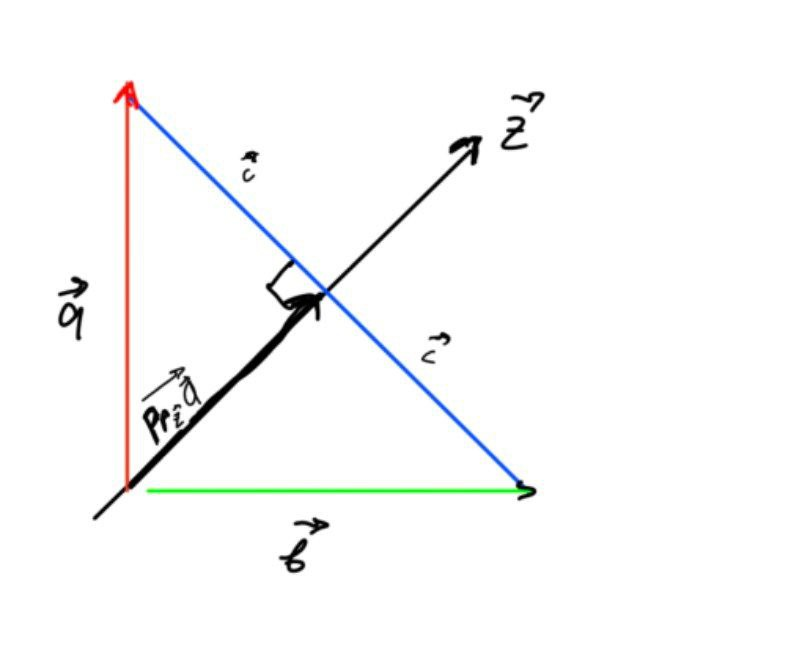

Из геометрических соображений: 
$$
\begin{align*}
&\vec{b} = \vec{a} + 2 \vec{c} \\
&\vec{c} = Pr_{\vec{z}} \vec{a} - \vec{a} \\
& \vec{b}  = 2 Pr_{\vec{z}} \vec{a} - \vec{a}
\end{align*}
$$
Взяв в качестве вектора z вектор с координатами (1, k) получим такую матрицу: 
$$
\frac{1}{1+k^2}
\begin{pmatrix}
1-k^2 & 2k \\
2k & k^2-1
\end{pmatrix}
$$

In [53]:
def matrix_simmetrical(coefficence:float) -> np.ndarray:
    matrix = np.array(
        [ 
            [1-coefficence**2, 2*coefficence],
            [2*coefficence, coefficence**2-1]
        ]
    ) * 1/(1+coefficence**2)
    return matrix


In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент y=kx
        k=2
        matrix = matrix_simmetrical(k)
        line = FunctionGraph(lambda t: k*t, color=RED)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

2. Отображение всей плоскости в прямую $y = bx \\$

Аналогично предыдущему, получим, что все вектора проектируются на одну прямую.
$$
\begin{pmatrix}
1 & 0 \\
k & 0
\end{pmatrix}
$$

In [55]:
def matrix_project(coefficence : float) -> np.ndarray:
    matrix = np.array(
        [
            [1, 0],
            [coefficence, 0]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент b=kx
        k=2
        matrix = matrix_project(k)
        line = FunctionGraph(lambda t: k*t, color=RED)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

3. Поворот против часовой стрелки на 10с градусов

Построим вектора:


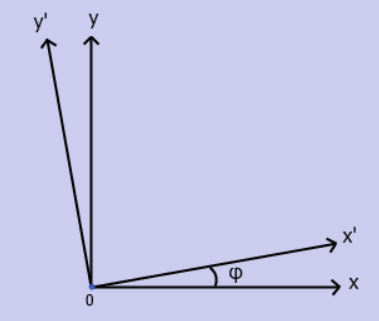

Возьмём произвольный вектор r, получим то его координаты:
$$
\begin{align*}
&x = |r| \cos \alpha \\
&y = |r| \sin \alpha \\
&x' = |r| \cos (\alpha - \phi) = |r| \cos \alpha \cos \phi + |r| \sin \alpha \sin \phi\\ &= x \cos \alpha + y \sin \phi \\
&y' = |r| \sin ( \alpha - \phi) = |r| \sin \alpha \cos \phi - |r| \cos \alpha \sin \phi = y \cos \phi - x \sin \phi \\


&\begin{pmatrix}
\cos \phi  & \sin \phi \\
- \sin \phi & \cos \phi
\end{pmatrix}
\end{align*}
$$

In [68]:
def matrix_rotate10(coefficence : float) -> np.ndarray:
    matrix = np.array(
        [
            [np.cos(np.deg2rad(-10 * coefficence)), np.sin(np.deg2rad(-10 * coefficence))],
            [-np.sin(np.deg2rad(-10 * coefficence)), np.cos(np.deg2rad(-10 * coefficence))]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент c
        k=9
        matrix = matrix_rotate10(k)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane, rate_func=linear), ApplyMatrix(matrix,poly, rate_func=linear))
        self.wait()

4.  Центральная симметрия плоскости относительно начала координат

$$
\begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [72]:
def matrix_cent_simmetry() -> np.ndarray:
    matrix = np.array(
        [
            [-1, 0],
            [0, -1]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_cent_simmetry()
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

5. Сначала отражение относительно прямой $y = ax$, потом поворот на $10d$ градусов по часовой стрелке.

$$
\frac{1}{1+k^2}
\begin{pmatrix}
1-k^2 & 2k \\
2k & k^2-1
\end{pmatrix} \begin{pmatrix}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{pmatrix} = \frac{1}{1+k^2} \begin{pmatrix}
(1-k^2)\cos \phi - 2k \sin \phi & 2k\cos \phi - (k^2-1)\sin \phi \\
(1-k^2)\sin \phi+2k\cos \phi & 2k\sin \phi+(k^2-1)\cos \phi
\end{pmatrix}
$$

In [85]:
def matrix_simmetry10_then_rotate(coefficence:float, angle:float) -> np.ndarray:
    angle = np.deg2rad(angle * 10)
    matrix = np.array([
        [(1-coefficence**2)*np.cos(angle)-2*coefficence*np.sin(angle), 2*coefficence*np.cos(angle) - (coefficence**2-1)*np.sin(angle)],
        [(1-coefficence**2)*np.sin(angle)+2*coefficence*np.cos(angle), 2*coefficence*np.sin(angle) + (coefficence**2-1)*np.cos(angle)]
    ])
    return matrix * 1/(1+coefficence**2)
print(matrix_simmetry10_then_rotate(2,9))

[[-0.8 -0.6]
 [-0.6  0.8]]


In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        k = 2
        angle=2
        matrix = matrix_simmetry10_then_rotate(k, angle)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line = FunctionGraph(lambda t: k*t, color=RED)

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()
        self.play(ApplyMatrix(matrix, line))
        self.wait()

6. Отображение, которое переводит прямую $y = 0$ в $y = ax$ и прямую $x = 0$ в $y = bx$.

In [27]:
def matrix_ax_bx(a:float, b:float) -> np.ndarray:
    matrix = np.array(
    [
        [1, b],
        [a, 1]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        a = 2
        b = -1
        matrix = matrix_ax_bx(a, b)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: a*t, color=RED)
        line2 = FunctionGraph(lambda t: b*t, color=GREEN)


        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1), Create(line2))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()
        self.wait()

7. Отображение, которое переводит прямую $y = ax$ в $y = 0$ и прямую $x = bx$ в $x = 0$ .

Т.к. это отображение обратно предыдущему, то ему будет соотвествовать обратная матрица.
$\det (\begin{pmatrix} 1 & b\\ a & 1\end{pmatrix})=1-ab\neq 0$
$$
\begin{pmatrix}
1 & b \\
a & 1
\end{pmatrix} ^ {-1} = \frac{1}{1-ab}\begin{pmatrix}
1 & -b \\
-a & 1
\end{pmatrix} 
$$

In [29]:
def matrix_ax_bx(a:float, b:float) -> np.ndarray:
    matrix = np.array(
    [
        [1, -b],
        [-a, 1]
    ]
    )
    return matrix * 1/(1-a*b)

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        a = 2
        b = -1
        matrix = matrix_ax_bx(a, b)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: a*t, color=RED)
        line2 = FunctionGraph(lambda t: b*t, color=GREEN)


        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1), Create(line2))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix,line1), ApplyMatrix(matrix,line2))
        self.wait()

8. Отображение, которое меняет местами прямые $y = ax$ и $y = bx$.
Т.е. надо перевести вектор $(1, a) \to (1, b)$
$$
\begin{pmatrix}
1 & 0 \\
0 & \frac{b}{a}
\end{pmatrix}
$$

In [31]:
def matrix_ax_to_bx(a:float, b:float) -> np.ndarray:
    matrix = np.array(
    [
        [1, 0],
        [0, b/a]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        a = 1
        b = -1
        matrix = matrix_ax_to_bx(a, b)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: a*t, color=RED)
        line2 = FunctionGraph(lambda t: b*t, color=GREEN)


        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1), Create(line2))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix,line1), ApplyMatrix(matrix,line2))
        self.wait()

9. Отображение, которое переводит круг единичной площади с центром в начале координат в круг площади c.

Т.к. $det$ показывает во сколько раз увиличивается любая площадь, то надо чтобы у нашей матрицы $det = c$
$$
\begin{pmatrix}
\sqrt{ c } & 0 \\
0 & \sqrt{ c }
\end{pmatrix}
$$

In [35]:
def matrix_scale_c_times(c:float) -> np.ndarray:
    matrix = np.array(
    [
        [np.sqrt(c), 0],
        [0, np.sqrt(c)]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        c=2
        matrix = matrix_scale_c_times(c)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        circle = Circle(radius=1)

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(circle))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix, circle))
        self.wait()

10. Отображение, которое переводит круг единичной площади с центром в начале координат в некруг площади d.

К примеру элипс - уже не круг, так что достаточно "растянуть" один из базисных векторов. $d \neq 1$, иначе получим круг :)
$$
\begin{pmatrix}
1 & 0 \\
0 & d
\end{pmatrix}
$$

In [40]:
def matrix_convert_to_area(d:float) -> np.ndarray:
    matrix = np.array(
    [
        [1, 0],
        [0, d]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        d=2
        matrix = matrix_convert_to_area(d)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        circle = Circle(radius=1)

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(circle))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix, circle))
        self.wait()

11. Отображение, у которого собственные вектора перпендикулярны, и ни один из них не лежит на прямой $y = 0$ или $y = x$.
к примеру возьму два вектора $(1, 2); (2, -1)$ - они ортогональны друг другу. Пусть они будут собственными векторами нашего отображения, подберём такую матрицу, что
$$
\begin{cases}
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix} \begin{pmatrix}
1 \\
2
\end{pmatrix} = \begin{pmatrix}
\lambda_{1} \\
2 \lambda_{1}
\end{pmatrix} \\
\begin{pmatrix}
a & b \\
c & d 
\end{pmatrix} \begin{pmatrix}
2 \\
-1
\end{pmatrix} = \begin{pmatrix}
2 \lambda_{2} \\
-\lambda_{2}
\end{pmatrix}
\end{cases}
$$
Например, если мы отразим плоскость относительно прямой $y=2\cdot x$
$$
\frac{1}{1+k^2}
\begin{pmatrix}
1-k^2 & 2k \\
2k & k^2-1
\end{pmatrix} \to^{k=2} \begin{pmatrix}
-\frac{3}{5} & \frac{4}{5} \\
\frac{4}{5} & \frac{3}{5}
\end{pmatrix}
$$


In [53]:
def matrix_eigen_vectors() -> np.ndarray:
    matrix = np.array(
    [
        [-3/5, 4/5],
        [4/5, 3/5]
    ]
    )
    return matrix


In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_eigen_vectors()
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: 2*t)
        line2 = FunctionGraph(lambda t: -0.5*t)

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1))
        self.play(Create(line2))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix, line1), ApplyMatrix(matrix, line2))
        self.wait()

12. Отображение, у которого нет двух неколлинеарных собственных векторов
К такому отображению относится например, отображение всего пространства в прямую $y=bx$
$$
\begin{pmatrix}
1 & 0 \\
k & 0
\end{pmatrix} \to \begin{pmatrix}
1 & 0 \\
2  & 0
\end{pmatrix}
$$

In [55]:
def matrix_eigen_vectors_noncolenear() -> np.ndarray:
    matrix = np.array(
    [
        [1, 0],
        [2, 0]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_eigen_vectors_noncolenear()
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: 2*t)

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly), ApplyMatrix(matrix, line1))
        self.wait()

13. Отображение, у которого нет ни одного вещественного собственного вектора (но при этом само отображение задаётся вещественной матрицей).

К такому отображению можно отнести например поворот по часовой стрелки на 90 градусов.
$$
\begin{pmatrix}
\cos 90 & \sin 90 \\
-\sin 90 & \cos 90
\end{pmatrix} = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
$$


In [68]:
def matrix_eigen_vectors_nonexist() -> np.ndarray:
    matrix = np.array(
    [
        [0,1],
        [-1,0]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_eigen_vectors_nonexist()
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

14. Отображение, для которого любой ненулевой вектор является собственным.

$$
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

15. Пару отображений, последовательное применение которых даёт различные результаты в зависимости от порядка: AB ̸= BA. Cделайте визуализацию всех рассматриваемых отображений, а именно: A, B, AB и BA.

$$A = 
\begin{pmatrix}
1 & 0 \\
1 & 2
\end{pmatrix}
$$
$$ B =
\begin{pmatrix}
0 & -1 \\
-1  & 3
\end{pmatrix}
$$


In [71]:
def matrix_noncommutable(a: str) -> np.ndarray:
    if a == 'A':
        return np.array([
            [1,0],
            [1,2]
        ])
    if a == 'B':
        return np.array([
            [0,-1],
            [-1,3]
        ])
    if a == 'AB':
        return np.array([
            [1,0],
            [1,2]
        ]) @ np.array([
            [0,-1],
            [-1,3]
        ])
    if a == 'BA':
        return np.array([
            [0,-1],
            [-1,3]
        ]) @ np.array([
            [1,0],
            [1,2]
        ])
    

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_noncommutable('BA')
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

16. Пару отображений, последовательное применение которых даёт одинаковый результат независимо от порядка: AB = BA. Постарайтесь, чтобы матрицы A и B были максимально непохожими друг на друга. Сделайте визуализацию, аналогичную передыдущему пункту.

$$
\begin{align*}
& A= \begin{pmatrix}
1 & 2 \\
2 & 3
\end{pmatrix}\\

&B=\begin{pmatrix}
4 & 5 \\
5 & 6
\end{pmatrix}
\end{align*}
$$


In [82]:
def matrix_commutable(a: str) -> np.ndarray:
    if a == 'A':
        return np.array([
            [1,2],
            [2,3]
        ])
    if a == 'B':
        return np.array([
            [4,5],
            [5,6]
        ])
    if a == 'AB':
        return np.array([
            [1,2],
            [2,3]
        ]) @ np.array([
            [4,5],
            [5,6]
        ])
    if a == 'BA':
        return np.array([
            [4,5],
            [5,6]
        ]) @ np.array([
            [1,2],
            [2,3]
        ])

In [84]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_commutable('BA')
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        
        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

Manim Community v0.18.1

## Задание 2


1.$$ \begin{align*}&Range\begin{pmatrix}-\frac{3}{5} & \frac{4}{5} \\\frac{4}{5} & \frac{3}{5}\end{pmatrix} = Span(\begin{pmatrix}1  \\0\end{pmatrix}; \begin{pmatrix}0 \\1\end{pmatrix}) \\&Nullspace\begin{pmatrix}-\frac{3}{5} & \frac{4}{5} \\\frac{4}{5} & \frac{3}{5}\end{pmatrix} = (0) \\&\det = -1 \\&\lambda_{1} = 1, \lambda_{2} = -1 \\&v_{1} = \begin{pmatrix}\frac{1}{2} \\1\end{pmatrix}; v_{2} = \begin{pmatrix}-2 \\1\end{pmatrix}\end{align*}$$2.$$ \begin{align*}&Range\begin{pmatrix}1 & 0 \\1 & 0\end{pmatrix} = Span(\begin{pmatrix}1  \\0\end{pmatrix}) \\&Nullspace\begin{pmatrix}1 & 0 \\1 & 0\end{pmatrix} =  Span(\begin{pmatrix}0  \\1\end{pmatrix})\\&\det = 0 \\&\lambda_{1} = 1 \\&v_{1} = \begin{pmatrix}1 \\1\end{pmatrix}\end{align*}$$3.$$\begin{align*} \\&\begin{pmatrix}0 & 1 \\-1 & 0\end{pmatrix} \\&\det = 1 \\&\lambda = \pm i \\&v = \begin{pmatrix}1 \\\pm i\end{pmatrix}\end{align*}$$4.$$\begin{align*}&\begin{pmatrix}-1 & 0 \\0 & -1\end{pmatrix} \\&\det = 1 \\ \\&\lambda_{12} = -1 \\&v_{1}, v_{2} = \begin{pmatrix}1 \\0\end{pmatrix}; \begin{pmatrix}0 \\1\end{pmatrix}\end{align*}$$5.$$\begin{align*}&\begin{pmatrix}-0.8 & -0.6 \\-0.6 & 0.8\end{pmatrix} \\& \det = -1 \\&k=2, \alpha = 90\end{align*}$$8.$$\begin{align*}&\begin{pmatrix}1 & 0 \\0 & \frac{1}{2}\end{pmatrix} \\&\lambda_{1}=\frac{1}{2}; \lambda_{2}=1 \\&v_{1}=\begin{pmatrix}0 \\1\end{pmatrix}; v_{2} = \begin{pmatrix}1 \\0\end{pmatrix}\end{align*}$$9.$$\begin{align*}&\begin{pmatrix}\sqrt{ c } & 0 \\0 & \sqrt{ c }\end{pmatrix} \\&\det = c\end{align*}$$10.$$\begin{align*}\begin{pmatrix}1 & 0 \\0 & 2\end{pmatrix} \\\det=2\end{align*}$$11.$$\begin{align*}&\begin{pmatrix}-\frac{3}{5} & \frac{4}{5} \\\frac{4}{5} & \frac{3}{5}\end{pmatrix} \\&\lambda_{1} = 1, \lambda_{2} = -1 \\&v_{1} = \begin{pmatrix}\frac{1}{2} \\1\end{pmatrix}; v_{2} = \begin{pmatrix}-2 \\1\end{pmatrix}\end{align*}$$12.$$\begin{align*}&\begin{pmatrix}1 & 0 \\0 & 2\end{pmatrix} \\&\lambda_{1}=1; \lambda_{2}=2 \\&v_{1}=\begin{pmatrix}1 \\0 \end{pmatrix}; v_{2}=\begin{pmatrix}0  \\1\end{pmatrix}\end{align*}$$13. $$\begin{align*} \\&\begin{pmatrix}0 & 1 \\-1 & 0\end{pmatrix} \\&Nullspace = (0) \\&Range = Span(\begin{pmatrix}1 \\0\end{pmatrix};\begin{pmatrix}0 \\1\end{pmatrix})\\&\lambda = \pm i \\&v = \begin{pmatrix}1 \\\pm i\end{pmatrix}\end{align*}$$14.$$\begin{align*}&\begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix} \\& Nullspace = (0) \\& Range = Span(\begin{pmatrix}1 \\0\end{pmatrix};\begin{pmatrix}0 \\1\end{pmatrix})\\& \lambda = 1 \\&v_{1} = \begin{pmatrix}1 \\0\end{pmatrix}; v_{2}=\begin{pmatrix}0 \\1\end{pmatrix}\end{align*}$$15.$$\begin{align*}&\begin{pmatrix}1 & 0 \\1 & 2\end{pmatrix} \\&\lambda_{1}=1; \lambda_{2}=2 \\&v_{1}=\begin{pmatrix}-1 \\1\end{pmatrix};v_{2}=\begin{pmatrix}0 \\1\end{pmatrix} \\&\begin{pmatrix}0 & -1 \\-1 & 3\end{pmatrix} \\&\lambda_{12} = \pm\frac{-\sqrt{ 13 }+3}{2} \\&v_{12}=\begin{pmatrix} \frac{\mp\sqrt{ 13 }+3}{2} \\1\end{pmatrix}\end{align*}$$16.$$\begin{align*}&\begin{pmatrix}1 & 2 \\2 & 3\end{pmatrix} \\&\lambda_{12}= \pm \sqrt{ 5 }+2 \\&v_{12}=\begin{pmatrix}\frac{\pm \sqrt{ 5 }-1}{2} \\1\end{pmatrix} \\&\begin{pmatrix}4 & 5 \\5 & 6\end{pmatrix} \\&\lambda_{12} = \pm \sqrt{ 26 }+5 \\&v_{12}=\begin{pmatrix}\frac{\pm\sqrt{ 26 }-1}{5} \\1\end{pmatrix}\end{align*}$$